<a href="https://colab.research.google.com/github/MarkNCI/AI-Ml-Diploma/blob/main/MHayden_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Description
I am using the Personal Key Indicators of Heart Disease dataset from [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), which is an annual telephone survey conducted by the United States Center for Disease Control in 2020 with over 400,000 participents.

## Column Descriptions

```
HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
BMI: Body Mass Index (BMI).
Smoking: Have you smoked at least 100 cigarettes in your entire life?
AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
Stroke: (Ever told) (you had) a stroke?
PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
DiffWalking: Do you have serious difficulty walking or climbing stairs?
Sex: Are you male or female?
AgeCategory: Fourteen-level age category. (then calculated the mean)
Race: Imputed race/ethnicity value.
Diabetic: (Ever told) (you had) diabetes?
PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
GenHealth: Would you say that in general your health is...
SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
Asthma: (Ever told) (you had) asthma?
KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
SkinCancer: (Ever told) (you had) skin cancer?

```



In [1]:
# Load Libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

## Upload Cancer Patients dataset (Goodle Colab) ##
# uploaded = files.upload()

In [2]:
# Load dataset
df = pd.read_csv('/content/heart_2020_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Dataset Details

In [3]:
print(df.columns,'\n')
df.head()

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object') 



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Count nulls
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# Categorical columns
categorical = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
               'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for cat in categorical:
  print(cat)
  print(np.unique(df[cat].values))

HeartDisease
['No' 'Yes']
Smoking
['No' 'Yes']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
Race
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
Diabetic
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
PhysicalActivity
['No' 'Yes']
GenHealth
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
Asthma
['No' 'Yes']
KidneyDisease
['No' 'Yes']
SkinCancer
['No' 'Yes']


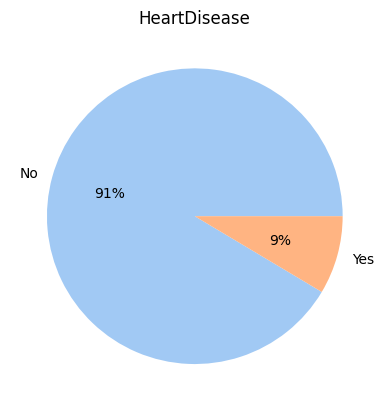

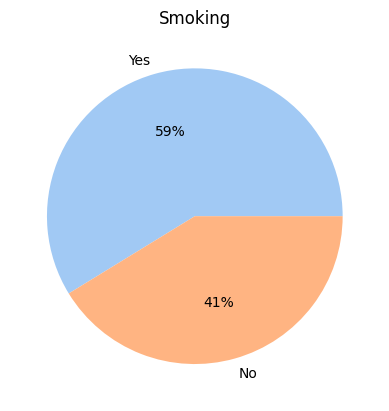

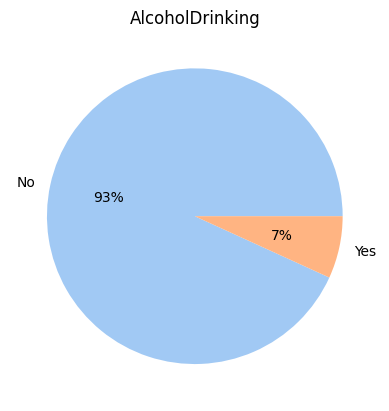

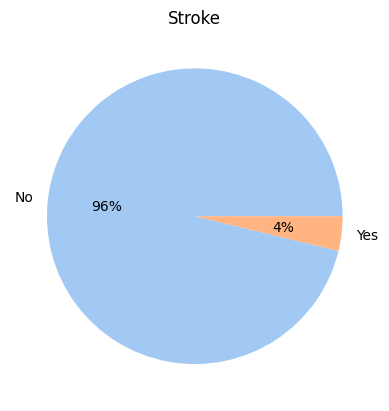

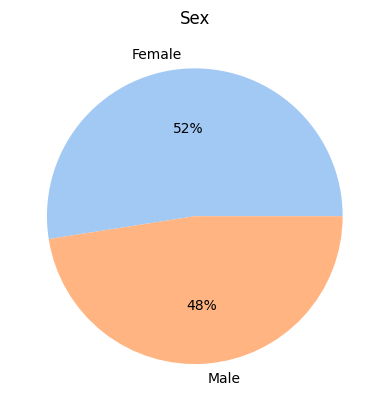

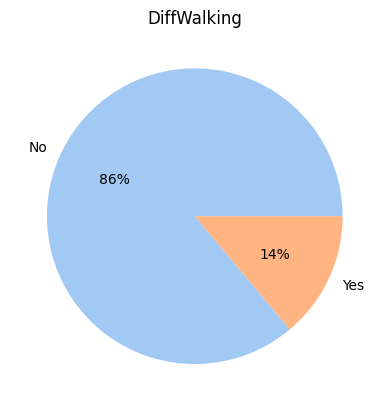

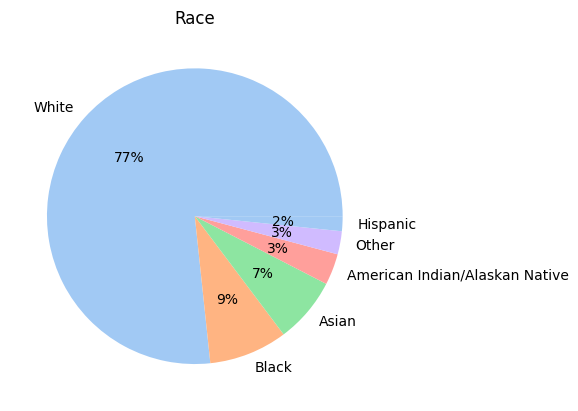

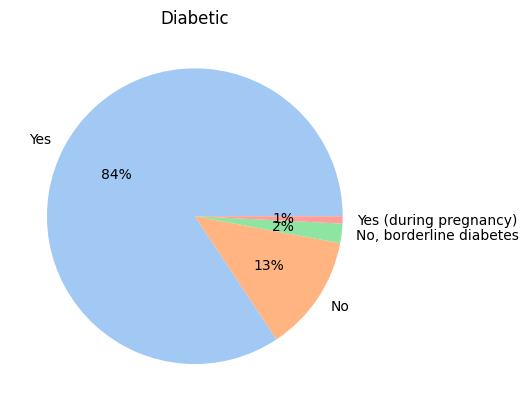

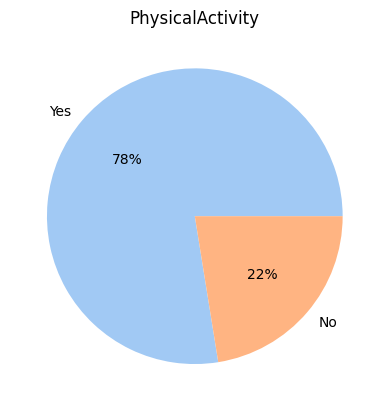

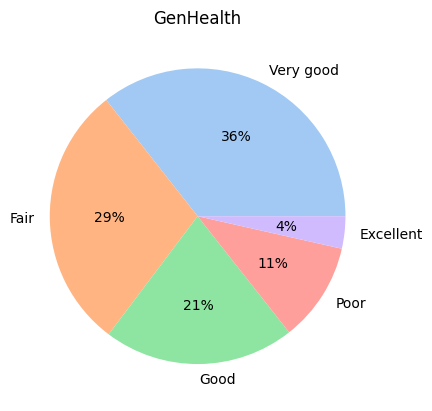

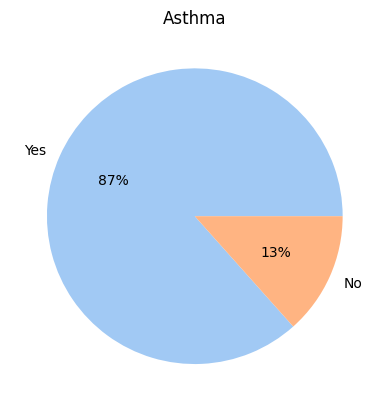

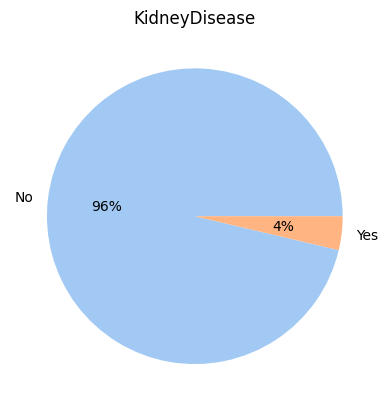

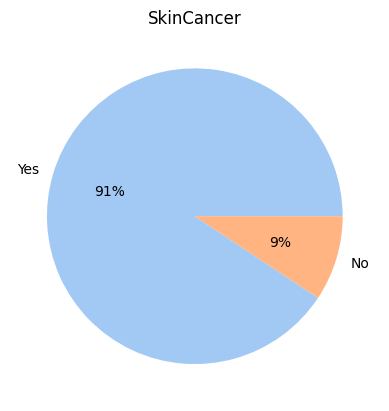

In [ ]:
# Stats per Categorical column
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['HeartDisease'].value_counts(),labels = df['HeartDisease'].unique(), colors = colors, autopct='%.0f%%')
plt.title('HeartDisease')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Smoking'].value_counts(),labels = df['Smoking'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Smoking')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['AlcoholDrinking'].value_counts(),labels = df['AlcoholDrinking'].unique(), colors = colors, autopct='%.0f%%')
plt.title('AlcoholDrinking')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Stroke'].value_counts(),labels = df['Stroke'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Stroke')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Sex'].value_counts(),labels = df['Sex'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Sex')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['DiffWalking'].value_counts(),labels = df['DiffWalking'].unique(), colors = colors, autopct='%.0f%%')
plt.title('DiffWalking')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Race'].value_counts(),labels = df['Race'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Race')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Diabetic'].value_counts(),labels = df['Diabetic'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Diabetic')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['PhysicalActivity'].value_counts(),labels = df['PhysicalActivity'].unique(), colors = colors, autopct='%.0f%%')
plt.title('PhysicalActivity')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['GenHealth'].value_counts(),labels = df['GenHealth'].unique(), colors = colors, autopct='%.0f%%')
plt.title('GenHealth')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Asthma'].value_counts(),labels = df['Asthma'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Asthma')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['KidneyDisease'].value_counts(),labels = df['KidneyDisease'].unique(), colors = colors, autopct='%.0f%%')
plt.title('KidneyDisease')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['SkinCancer'].value_counts(),labels = df['SkinCancer'].unique(), colors = colors, autopct='%.0f%%')
plt.title('SkinCancer')
plt.show()

# Feature Extraction

In [6]:
# Converting ages into mean
print(df['AgeCategory'].unique())
df['Age'] = df['AgeCategory'].apply(lambda x: '57' if x == '55-59' else '80' if x == '80 or older' 
                                    else '67' if x == '65-69' else '77' if x == '75-79' else '42' if x == '40-44'
                                    else '72' if x == '70-74' else '62' if x == '60-64' else '52' if x == '50-54' 
                                    else '47' if x == '45-49' else '20' if x == '18-24' else '37' if x == '35-39' 
                                    else '32' if x == '30-34' else '27' if x == '25-29' else x)
print(df['Age'].unique())
df = df.drop(columns=['AgeCategory'])
df.columns

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['57' '80' '67' '77' '42' '72' '62' '52' '47' '20' '37' '32' '27']


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Age'],
      dtype='object')

In [7]:
# Numerical columns: Normalise between 0 and 1
numerical = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for num in numerical:
  df[num] = df[num]/df[num].max()

df[numerical]

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.175013,0.100000,1.0,0.208333
1,0.214444,0.000000,0.0,0.291667
2,0.280232,0.666667,1.0,0.333333
3,0.255245,0.000000,0.0,0.250000
4,0.249974,0.933333,0.0,0.333333
...,...,...,...,...
319790,0.288983,0.233333,0.0,0.250000
319791,0.314602,0.000000,0.0,0.208333
319792,0.255561,0.000000,0.0,0.250000
319793,0.345915,0.000000,0.0,0.500000


In [8]:
# Count unique values in categorical columns
print(df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']].nunique()>2)

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
DiffWalking         False
Sex                 False
Race                 True
Diabetic             True
PhysicalActivity    False
GenHealth            True
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool


In [9]:
# For columns with 2 unique values, sklearn labelencoder
encoder = preprocessing.LabelEncoder()
for col in df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]:
  df[col] = encoder.fit_transform(df[col])

# One Hot Encoding for columns with more than 2 unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth'], prefix= ['Race', 'Diabetic', 'GenHealth'])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [10]:
# Checking to see if dataset is balanced
train_df = df[:int(len(df)*0.8)]
test_df = df[int(len(df)*0.8):]
print(train_df['HeartDisease'].value_counts())
print(test_df['HeartDisease'].value_counts())

0    233851
1     21985
Name: HeartDisease, dtype: int64
0    58571
1     5388
Name: HeartDisease, dtype: int64


In [11]:
# As dataset is imbalanced, will oversample to balance out
no_heartdisease = train_df[train_df['HeartDisease'] == 0]
has_heartdisease = train_df[train_df['HeartDisease'] == 1]

has_heartdisease = has_heartdisease.sample(len(no_heartdisease),replace=True)
train_df = pd.concat([no_heartdisease, has_heartdisease], axis=0)
print(train_df['HeartDisease'].value_counts())

# As dataset is imbalanced, will oversample to balance out
no_heartdisease = test_df[test_df['HeartDisease'] == 0]
has_heartdisease = test_df[test_df['HeartDisease'] == 1]

has_heartdisease = has_heartdisease.sample(len(no_heartdisease),replace=True)
test_df = pd.concat([no_heartdisease, has_heartdisease], axis=0)
print(test_df['HeartDisease'].value_counts())

0    233851
1    233851
Name: HeartDisease, dtype: int64
0    58571
1    58571
Name: HeartDisease, dtype: int64


In [9]:
print('ready')

ready


In [ ]:
# X_train = np.array(train_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
#        'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age',
#        'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
#        'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
#        'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
#        'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
#        'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
#        'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
#        'GenHealth_Very good']])
# y_train = np.array(train_df['HeartDisease'])

# X_test = np.array(test_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
#        'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age',
#        'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
#        'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
#        'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
#        'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
#        'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
#        'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
#        'GenHealth_Very good']])
# y_test = np.array(test_df['HeartDisease'])

In [12]:
X_train = train_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']]
y_train = train_df['HeartDisease']

X_test = test_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']]
y_test = test_df['HeartDisease']

In [13]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)



```
TODO:
1) Hyperparameter tuning on Neural network
```



In [14]:
%%time
dt = DecisionTreeClassifier().fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(str(score))

0.5763005582967681
CPU times: user 4.95 s, sys: 430 µs, total: 4.95 s
Wall time: 8.12 s


In [15]:
%%time
rf = RandomForestClassifier().fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(str(score))

0.5854518447695959
CPU times: user 1min 15s, sys: 487 ms, total: 1min 15s
Wall time: 1min 16s


In [18]:
%%time
dt = KNeighborsClassifier().fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(str(score))

0.6567584640863225
CPU times: user 9min 27s, sys: 777 ms, total: 9min 27s
Wall time: 5min 37s


In [16]:
%%time
nb = GaussianNB().fit(X_train, y_train)
score = nb.score(X_test, y_test)
print(str(score))

0.7179235457820423
CPU times: user 213 ms, sys: 21 ms, total: 234 ms
Wall time: 236 ms


In [19]:
%%time
mlp = MLPClassifier(random_state=1, max_iter=300,alpha=1).fit(X_train, y_train)
score = mlp.score(X_test, y_test)
print(str(score))

0.759129944853255
CPU times: user 7min 48s, sys: 3min 48s, total: 11min 37s
Wall time: 6min 41s


In [17]:
%%time
lr = LinearRegression().fit(X_train, y_train)
score = lr.score(X_test, y_test)
print(str(score))

0.3254826729380911
CPU times: user 640 ms, sys: 239 ms, total: 878 ms
Wall time: 808 ms


In [ ]:
# X_train = train_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
#        'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age',
#        'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
#        'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
#        'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
#        'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
#        'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
#        'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
#        'GenHealth_Very good']]
# y_train = train_df['HeartDisease']

# X_test = test_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
#        'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age',
#        'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
#        'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
#        'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
#        'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
#        'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
#        'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
#        'GenHealth_Very good']]
# y_test = test_df['HeartDisease']

In [20]:
len(train_df.columns)

30

In [21]:
# X_train = np.asarray(X_train).astype(np.float32)
# X_test = np.asarray(X_test).astype(np.float32)
# X_train

In [22]:
# y_train = np.asarray(y_train).astype(np.float32)
# y_test = np.asarray(y_test).astype(np.float32)
# y_test

In [34]:
# Neural Network
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim=29, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
14616/14616 [==============================] - 40s 3ms/step - loss: 0.4973 - accuracy: 0.7608
Epoch 2/100
14616/14616 [==============================] - 36s 2ms/step - loss: 0.4895 - accuracy: 0.7654
Epoch 3/100
14616/14616 [==============================] - 35s 2ms/step - loss: 0.4877 - accuracy: 0.7669
Epoch 4/100
14616/14616 [==============================] - 35s 2ms/step - loss: 0.4863 - accuracy: 0.7672
Epoch 5/100
14616/14616 [==============================] - 36s 2ms/step - loss: 0.4854 - accuracy: 0.7672
Epoch 6/100
14616/14616 [==============================] - 35s 2ms/step - loss: 0.4845 - accuracy: 0.7677
Epoch 7/100
14616/14616 [==============================] - 35s 2ms/step - loss: 0.4835 - accuracy: 0.7679
Epoch 8/100
14616/14616 [==============================] - 35s 2ms/step - loss: 0.4826 - accuracy: 0.7681
Epoch 9/100
14616/14616 [==============================] - 36s 2ms/step - loss: 0.4817 - accuracy: 0.7685
Epoch 10/100
14616/14616 [====================

In [36]:
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                1500      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 9,201
Trainable params: 9,201
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.7579689621925354
